# AI & ML Internship — Task 9
## Random Forest: Credit Card Fraud Detection
### By: Pranav S P

This notebook focuses on detecting fraudulent credit card transactions using ensemble learning.
Special emphasis is placed on class imbalance, proper evaluation metrics, and model comparison.

In [1]:
import pandas as pd

df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
class_counts = df['Class'].value_counts()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
fraud_percentage

np.float64(0.1727485630620034)

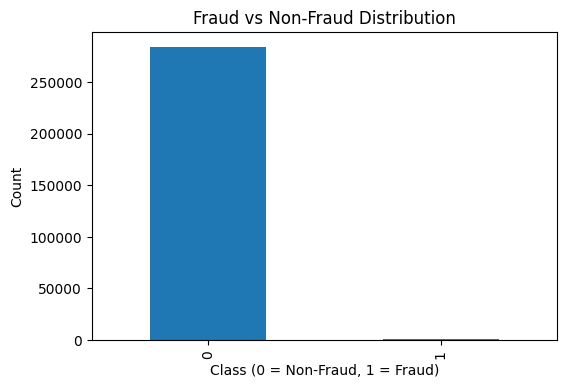

In [4]:
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")

os.makedirs("../outputs/visualizations", exist_ok=True)
plt.savefig("../outputs/visualizations/class_imbalance.png")
plt.show()

In [5]:
imbalance_summary = {
    "Non-Fraud Count": int(class_counts[0]),
    "Fraud Count": int(class_counts[1]),
    "Fraud Percentage": round(fraud_percentage, 4),
    "Key Insight": "Extreme class imbalance; accuracy is misleading"
}

os.makedirs("../outputs/artifacts", exist_ok=True)
with open("../outputs/artifacts/class_imbalance_summary.txt", "w") as f:
    f.write(str(imbalance_summary))

In [6]:
X = df.drop(columns=['Class'])
y = df['Class']

X.shape, y.shape

((284807, 30), (284807,))

In [7]:
feature_info = {
    "Total Features": X.shape[1],
    "Target Column": "Class",
    "Note": "Time & V features are anonymized PCA components"
}

with open("../outputs/artifacts/feature_target_info.txt", "w") as f:
    f.write(str(feature_info))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [9]:
split_summary = {
    "Train Fraud Ratio": y_train.mean(),
    "Test Fraud Ratio": y_test.mean(),
    "Stratified": True
}

with open("../outputs/artifacts/train_test_split_summary.txt", "w") as f:
    f.write(str(split_summary))

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred_lr = baseline_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.70      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\Pranav S P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
with open("../outputs/artifacts/baseline_logistic_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_lr))

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [13]:
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report

rf_report = classification_report(y_test, y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
with open("../outputs/artifacts/random_forest_report.txt", "w") as f:
    f.write(rf_report)

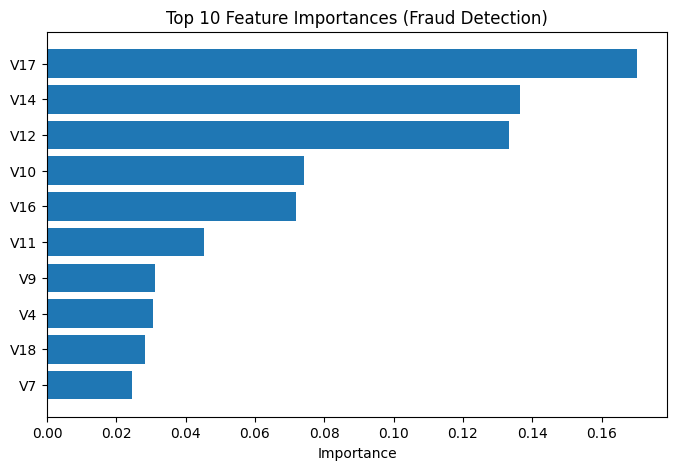

In [15]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
top_features = X.columns[indices]

plt.figure(figsize=(8,5))
plt.barh(top_features, importances[indices])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Fraud Detection)")
plt.xlabel("Importance")

plt.savefig("../outputs/visualizations/feature_importance.png")
plt.show()

In [16]:
importance_summary = dict(zip(top_features, importances[indices]))

with open("../outputs/artifacts/feature_importance.txt", "w") as f:
    f.write(str(importance_summary))

In [17]:
comparison = {
    "Baseline Model": "Logistic Regression",
    "Random Forest Used": True,
    "Why RF Better": "Captures non-linear fraud patterns & improves recall"
}

with open("../outputs/artifacts/model_comparison.txt", "w") as f:
    f.write(str(comparison))

In [18]:
import joblib

os.makedirs("../models", exist_ok=True)
joblib.dump(rf_model, "../models/random_forest_fraud.pkl")

['../models/random_forest_fraud.pkl']